In [23]:
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
web.DataReader('PLTR', 'yahoo-dividends', start='2020-09-30', end=date.today().strftime("%Y-%m-%d"))

,action,value


In [4]:
pltr = pdr.DataReader('PLTR', 'yahoo', start='2020-09-30', end=date.today().strftime("%Y-%m-%d"))
pltr['Mean'] = (pltr['High'] + pltr['Low'])/2

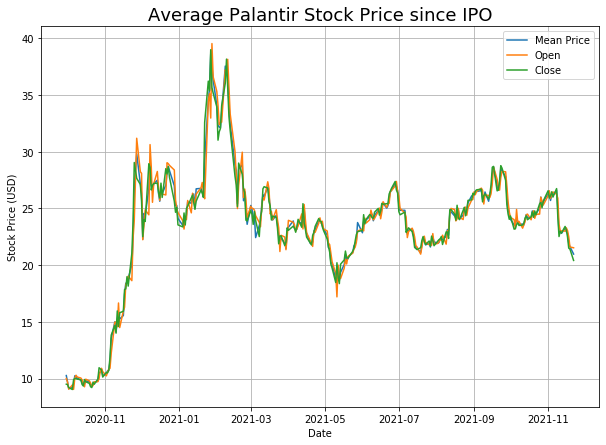

In [5]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(pltr['Mean'], label = 'Mean Price')
ax.plot(pltr['Open'], label = 'Open')
ax.plot(pltr['Close'], label = 'Close')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)') 
plt.title('Average Palantir Stock Price since IPO', fontsize = 18)
ax.grid()
ax.legend()

plt.show()

In [6]:
pltr_mean = np.array(pltr['Mean']).reshape(-1,1)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
pltr_scaled = min_max_scaler.fit_transform(pltr_mean)

In [7]:
X_data, y_data = [] , []
for i in range(50, len(pltr_scaled)):
    X_data.append(pltr_scaled[i-50:i, 0])
    y_data.append(pltr_scaled[i, 0])

In [25]:
X_train, X_test = np.array(X_data[0:round(0.8*len(X_data))]), np.array(X_data[round(0.8*len(X_data)):len(X_data)])
y_train, y_test = np.array(y_data[0:round(0.8*len(y_data))]), np.array(y_data[round(0.8*len(y_data)):len(y_data)])

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
6/6 [==============================] - 5s 48ms/step - loss: 0.1952
Epoch 2/100
6/6 [==============================] - 0s 46ms/step - loss: 0.0460
Epoch 3/100
6/6 [==============================] - 0s 41ms/step - loss: 0.0240
Epoch 4/100
6/6 [==============================] - 0s 42ms/step - loss: 0.0221
Epoch 5/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0200
Epoch 6/100
6/6 [==============================] - 0s 42ms/step - loss: 0.0171
Epoch 7/100
6/6 [==============================] - 0s 42ms/step - loss: 0.0138
Epoch 8/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0139
Epoch 9/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0151
Epoch 10/100
6/6 [==============================] - 0s 57ms/step - loss: 0.0144
Epoch 11/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0171
Epoch 12/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0175
Epoch 13/100
6/6 [==============================]

In [27]:
y_hat_test = regressor.predict(X_test)
y_hat_test = min_max_scaler.inverse_transform(y_hat_test)

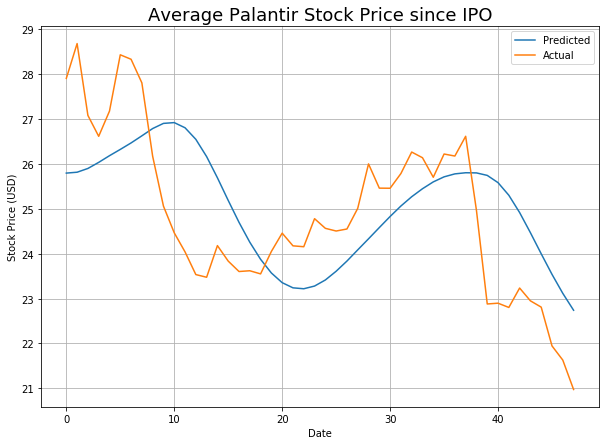

In [39]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(y_hat_test, label = 'Predicted')
ax.plot(min_max_scaler.inverse_transform(y_test.reshape(-1,1)), label = 'Actual')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)') 
plt.title('Average Palantir Stock Price since IPO', fontsize = 18)
ax.grid()
ax.legend()

plt.show()

In [28]:
y_hat_test

array([[25.794973],
       [25.814821],
       [25.898409],
       [26.033903],
       [26.182713],
       [26.32249 ],
       [26.467113],
       [26.625246],
       [26.787407],
       [26.902231],
       [26.919794],
       [26.804733],
       [26.547274],
       [26.162548],
       [25.690744],
       [25.186573],
       [24.698858],
       [24.255718],
       [23.874788],
       [23.57002 ],
       [23.354603],
       [23.239555],
       [23.21907 ],
       [23.279095],
       [23.414312],
       [23.60899 ],
       [23.835653],
       [24.084787],
       [24.331337],
       [24.58162 ],
       [24.8286  ],
       [25.061787],
       [25.268673],
       [25.44678 ],
       [25.599186],
       [25.711643],
       [25.777624],
       [25.802738],
       [25.799532],
       [25.744066],
       [25.582344],
       [25.301682],
       [24.916567],
       [24.46771 ],
       [23.997765],
       [23.539715],
       [23.116505],
       [22.740103]], dtype=float32)